In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import pandas

## Pie Plot

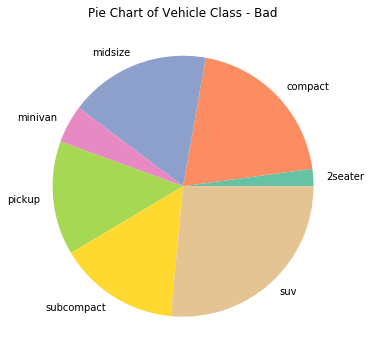

In [2]:
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(6, 6), colors=sns.color_palette("Set2"))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

## Pie plot with some exploding highlights

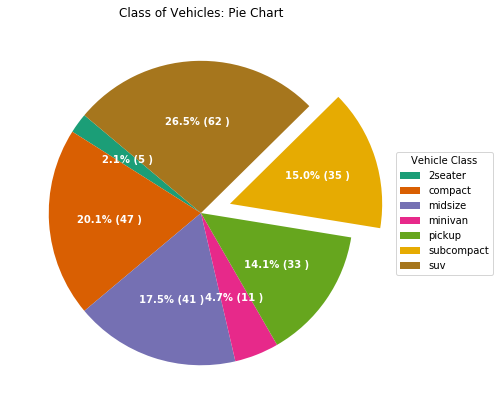

In [3]:
# Import
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.2,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

## Treemap, if you don't want to highlight the percentage difference

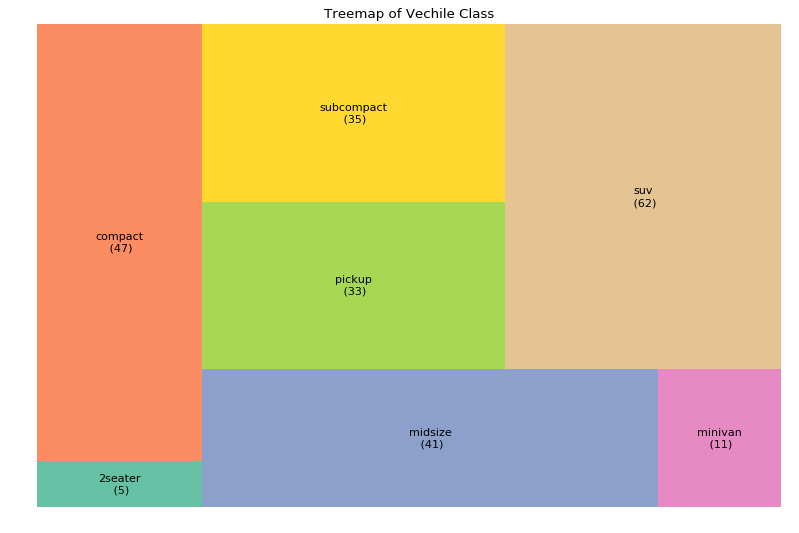

In [4]:
# pip install squarify
import squarify 

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
# colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette("Set2"))

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

## Donuts plot. 

In [ ]:
# create data
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')


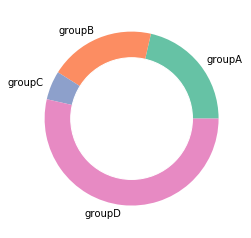

In [6]:
plt.pie(size, labels=names, colors=sns.color_palette("Set2"))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


## You may also want to add more info inside this donut

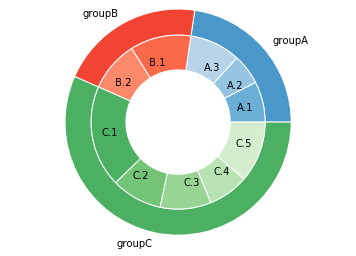

In [7]:
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


## Stacked Bar plot is also useful to representing percentage

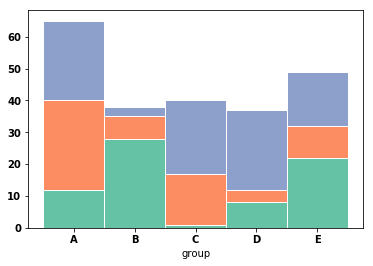

In [10]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2 (TO DO better)
bars = [40, 35, 17, 12, 32]
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color=sns.color_palette("Set2")[0], edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color=sns.color_palette("Set2")[1], edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color=sns.color_palette("Set2")[2], edgecolor='white', width=barWidth)
 
# Custom X axis 
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()


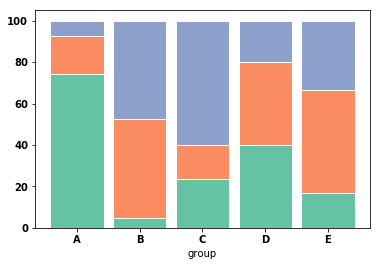

In [12]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color=sns.color_palette("Set2")[0], edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color=sns.color_palette("Set2")[1], edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color=sns.color_palette("Set2")[2], edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

## If there are some overlap cross categories...

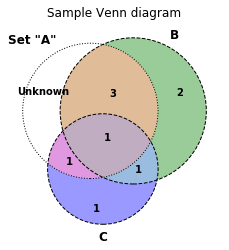

In [27]:
# libraries
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
 
# Make a Basic Venn
v = venn3(subsets=(1, 2, 3, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
 
# Custom it
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 2, 3, 1, 1, 1, 1), linestyle='dashed', lw=1)
c[0].set_lw(1.0)
c[0].set_ls('dotted')
 
# Add title and annotation
plt.title("Sample Venn diagram")
# plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
# ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
# arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
 
# Show it
plt.show()
